<a href="https://colab.research.google.com/github/LerinaMM/central_de_atendimento_a_mulher/blob/main/violencia_contra_mulher_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Conectar o Dataset a partir do drive

In [1]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/primeiro-semestre-2022.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [2]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/segundo-semestre-2022.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [3]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/primeiro-semestre-2023.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


# 2. Importar Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings('ignore')

#3. Verificação de Dados

In [5]:
#Nomear o primeiro conjunto de dados

dados_primeiro = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/primeiro-semestre-2022.csv')

In [6]:
#Nomear o segundo conjunto de dados

dados_segundo = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/segundo-semestre-2022.csv', encoding='utf-8', delimiter=';')

In [7]:
#Nomear o terceiro conjunto de dados

dados_terceiro = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/primeiro-semestre-2023.csv', encoding='utf-8', delimiter=';')

In [8]:
#Primeiros dados do primeiro conjunto

dados_primeiro.head()

,hash,Data de cadastro,Canal de atendimento,Denúncia emergencial,Denunciante,Cenário da violação,País,UF,Município,Frequência,...,Grau de instrução do suspeito,Religião do suspeito,Raça\Cor do suspeito,Suspeito Etnia,Faixa de renda do suspeito,Vínculo Órgão\PJ do suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,a5611e9f9458a2bfda61adbaf841a301,2022-01-01 00:02:39,TELEFÔNICO,SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - S...,TERCEIRO,CASA DA VÍTIMA,BRASIL,DF,BRASÍLIA,ÚNICA OCORRÊNCIA,...,ENSINO MÉDIO COMPLETO,N/D,PARDA,N/D,ATÉ 1 SM,NaN,N/D,N/D,N/D,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,a5611e9f9458a2bfda61adbaf841a301,2022-01-01 00:02:39,TELEFÔNICO,SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - S...,TERCEIRO,CASA DA VÍTIMA,BRASIL,DF,BRASÍLIA,ÚNICA OCORRÊNCIA,...,ENSINO MÉDIO COMPLETO,N/D,PARDA,N/D,ATÉ 1 SM,NaN,N/D,N/D,N/D,INTEGRIDADE>FÍSICA>LESÃO CORPORAL
2,a5611e9f9458a2bfda61adbaf841a301,2022-01-01 00:02:39,TELEFÔNICO,SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - S...,TERCEIRO,CASA DA VÍTIMA,BRASIL,DF,BRASÍLIA,ÚNICA OCORRÊNCIA,...,ENSINO MÉDIO COMPLETO,N/D,PARDA,N/D,ATÉ 1 SM,NaN,N/D,N/D,N/D,NaN
3,a5611e9f9458a2bfda61adbaf841a301,2022-01-01 00:02:39,TELEFÔNICO,SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - S...,TERCEIRO,CASA DA VÍTIMA,BRASIL,DF,BRASÍLIA,ÚNICA OCORRÊNCIA,...,ENSINO MÉDIO COMPLETO,N/D,PARDA,N/D,ATÉ 1 SM,NaN,N/D,N/D,N/D,NaN
4,a5611e9f9458a2bfda61adbaf841a301,2022-01-01 00:02:39,TELEFÔNICO,SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - S...,TERCEIRO,CASA DA VÍTIMA,BRASIL,DF,BRASÍLIA,ÚNICA OCORRÊNCIA,...,ENSINO MÉDIO COMPLETO,N/D,PARDA,N/D,ATÉ 1 SM,NaN,N/D,N/D,N/D,NaN


In [9]:
#Primeiros dados do segundo conjunto

dados_segundo.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


In [10]:
#Primeiros dados do terceiro conjunto

dados_terceiro.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,C544D154B72CE149B757BDA576FDDE2C6E964D2095E38A...,2023-01-16 13:10:49.980,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,RN,240800 | MOSSORÓ,OCASIONALMENTE,...,NaN,NaN,PRETA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
1,7C0A5EABEFB042E97F2F6878F18350C9EB23D0E1424DA5...,2023-04-13 19:18:01.150,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,BA,292740 | SALVADOR,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
2,5E7FAFF02AFF5A2F7F121FA78FE3472D039305DEC9C863...,2023-04-17 19:26:13.403,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,RJ,330455 | RIO DE JANEIRO,OCASIONALMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>INSUBSISTÊNCIA AFETIVA
3,4746DBA4CDE054A403FF1BCD40C520C8474FACBBE15495...,2023-03-18 17:19:59.397,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,LOCAL DE TRABALHO DA VÍTIMA,BR | BRASIL,BA,293305 | VÁRZEA DA ROÇA,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
4,059F9A9FAF34A5C9C41CEDCF7F9DA3EFA6764CC9F3D632...,2023-04-03 12:58:00.647,TELEFÔNICO,NÃO,TERCEIRO,UNIDADE PRISIONAL,BR | BRASIL,ES,320520 | VILA VELHA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,"SEGURANÇA PÚBLICA, FORÇAS ARMADAS, DEFESA CIVI...",NaN,NaN,DIREITOS SOCIAIS>EDUCAÇÃO


Algumas conclusões referentes aos conjuntos de dados

1. Verificamos que as colunas chamadas "municipio" e "pais" estão com respostas que se diferem dessa forma, teremos que realizar adequações nessas colunas

2. No primeiro conjunto de dados temos uma repetição de codigo da coluna "hash", dessa forma vamos eliminar as repetições

#4.Tratamento dos dados fora de padrão dos conjuntos de dados

## 4.1 - Verificação se temos dados duplicados

In [11]:
dados_segundo.duplicated().sum()

0

In [12]:
dados_terceiro.duplicated().sum()

0

## 4.2 - Verificação as colunas que possuem valores integrais nulos

In [13]:
dados_primeiro.isnull().sum()

hash                                 0
Data de cadastro                     0
Canal de atendimento                 0
Denúncia emergencial                 0
Denunciante                          0
                                 ...  
Vínculo Órgão\PJ do suspeito    978300
sl_suspeito_ramo                     0
suspeito_especificacao_etnia         0
vitima_especificacao_etnia           0
violacao                         93922
Length: 62, dtype: int64

In [14]:
dados_segundo.isnull().sum()

hash                                  0
Data_de_cadastro                      0
Canal_de_atendimento                  0
Denúncia_emergencial                 41
Denunciante                           0
                                 ...   
Vínculo_Órgão_PJ_do_suspeito    1188349
sl_suspeito_ramo                1112307
suspeito_especificacao_etnia    1185749
vitima_especificacao_etnia      1137819
violacao                              0
Length: 62, dtype: int64

#6. Verificação da quantidade de dados dos conjuntos

In [15]:
dados_primeiro.shape

(988941, 62)

In [16]:
dados_primeiro.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988941 entries, 0 to 988940
Data columns (total 62 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   hash                                                988941 non-null  object 
 1   Data de cadastro                                    988941 non-null  object 
 2   Canal de atendimento                                988941 non-null  object 
 3   Denúncia emergencial                                988941 non-null  object 
 4   Denunciante                                         988941 non-null  object 
 5   Cenário da violação                                 988917 non-null  object 
 6   País                                                988941 non-null  object 
 7   UF                                                  988941 non-null  object 
 8   Município                                           988941 non-n

In [17]:
dados_segundo.shape

(1188383, 62)

In [18]:
dados_segundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188383 entries, 0 to 1188382
Data columns (total 62 columns):
 #   Column                                          Non-Null Count    Dtype 
---  ------                                          --------------    ----- 
 0   hash                                            1188383 non-null  object
 1   Data_de_cadastro                                1188383 non-null  object
 2   Canal_de_atendimento                            1188383 non-null  object
 3   Denúncia_emergencial                            1188342 non-null  object
 4   Denunciante                                     1188383 non-null  object
 5   Cenário_da_violação                             1183014 non-null  object
 6   País                                            1187362 non-null  object
 7   UF                                              1187247 non-null  object
 8   Município                                       1186983 non-null  object
 9   Frequência              

In [19]:
dados_terceiro.shape

(1666513, 62)

# 7. União dos dois conjuntos de dados

In [20]:
#Realizando a uniao dos dois conjuntos de dados

dados_unidos = pd.concat([dados_segundo, dados_terceiro], ignore_index=True)

print(dados_unidos)

                                                      hash  \
0        A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...   
1        709A353AC30598A075D04B296943139E71D5B08CEDDD1C...   
2        35FEA1E1B00682B804F734A31C51555BA62F2722B43588...   
3        8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...   
4        2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...   
...                                                    ...   
2854891  C873F08A244D8011F3EFCE1F352F5FC5C5C27E21E109E2...   
2854892  3F80C715C84921A674255BCBC53D14009254B4E2ED4245...   
2854893  A41FB650C220111E81F1EA772D8642A80FA499D302BE7B...   
2854894  3A6EDE997B46991E32EB039376684BD0C5CCCFAB8C430F...   
2854895  8FFD995A735CCDEE294219F078F1F08097553C9CE44C77...   

                Data_de_cadastro Canal_de_atendimento  \
0        2022-08-10 11:25:43.003           TELEFÔNICO   
1        2022-07-20 12:58:24.817           TELEFÔNICO   
2        2022-10-30 20:53:36.507           TELEFÔNICO   
3        2022-10-31 00:57:3

In [21]:
dados_unidos.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


In [22]:
dados_unidos.tail()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
2854891,C873F08A244D8011F3EFCE1F352F5FC5C5C27E21E109E2...,2023-01-01 15:45:36.093,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,PE,261230 | SALOÁ,OCASIONALMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO
2854892,3F80C715C84921A674255BCBC53D14009254B4E2ED4245...,2023-03-29 15:39:12.107,TELEFÔNICO,RISCO IMINENTE DE MORTE DA VÍTIMA,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,RJ,330350 | NOVA IGUAÇU,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
2854893,A41FB650C220111E81F1EA772D8642A80FA499D302BE7B...,2023-03-09 22:58:33.637,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,BA,293135 | TEIXEIRA DE FREITAS,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE
2854894,3A6EDE997B46991E32EB039376684BD0C5CCCFAB8C430F...,2023-05-17 12:52:57.820,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,RS,431490 | PORTO ALEGRE,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE
2854895,8FFD995A735CCDEE294219F078F1F08097553C9CE44C77...,2023-05-17 00:05:44.487,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,US | ESTADOS UNIDOS,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA


In [23]:
# Verificação de quantas linhas temos no conjunto após a eliminação dos dados repetidos.

dados_unidos.shape

(2854896, 62)

In [45]:
dados_unidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840486 entries, 0 to 2854895
Data columns (total 66 columns):
 #   Column                                          Dtype 
---  ------                                          ----- 
 0   hash                                            object
 1   Data_de_cadastro                                object
 2   Canal_de_atendimento                            object
 3   Denúncia_emergencial                            object
 4   Denunciante                                     object
 5   Cenário_da_violação                             object
 6   País                                            object
 7   UF                                              object
 8   Município                                       object
 9   Frequência                                      object
 10  Início_das_violações                            object
 11  sl_quantidade_vitimas                           int64 
 12  Grupo_vulnerável                          

In [24]:
dados_unidos['violacao'].value_counts()

INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE                                                                                     283605
INTEGRIDADE>NEGLIGÊNCIA                                                                                                           269962
INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA                                                                                             266816
INTEGRIDADE>FÍSICA>MAUS TRATOS                                                                                                    253405
INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO                                                                                              195735
                                                                                                                                   ...  
INTEGRIDADE>NEGLIGÊNCIA,LIBERDADE>SEXUAL>FÍSICA>EXPLORAÇÃO SEXUAL                                                                      1
INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À S

#8. Análise de Dados

##8.1 Canais de Atendimento

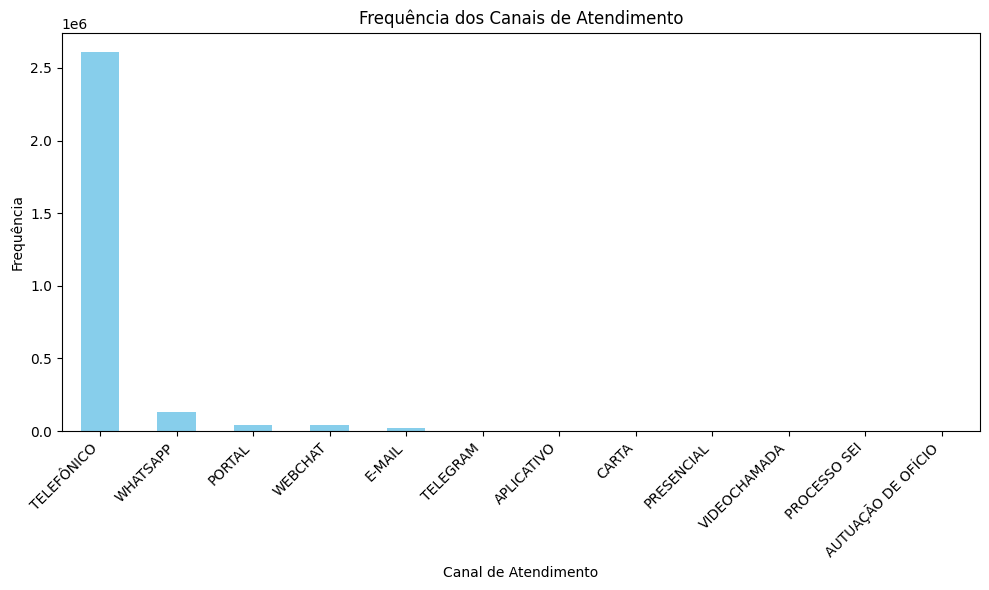

In [25]:
# Canais de atendimento: Analise a coluna 'canal_atendimento' para identificar os canais mais utilizados pelas vítimas para denunciar a violência.
# Isso pode ajudar a avaliar a eficácia dos diferentes canais e direcionar recursos para melhorar o suporte em canais mais utilizados.

# Conte a frequência de cada canal de atendimento
canais_frequencia = dados_unidos['Canal_de_atendimento'].value_counts()

# Crie um gráfico de barras para visualizar a frequência dos canais de atendimento
plt.figure(figsize=(10, 6))
canais_frequencia.plot(kind='bar', color='skyblue')
plt.title('Frequência dos Canais de Atendimento')
plt.xlabel('Canal de Atendimento')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
dados_unidos['Canal_de_atendimento'].value_counts()

TELEFÔNICO            2611125
WHATSAPP               130465
PORTAL                  42761
WEBCHAT                 41731
E-MAIL                  19078
TELEGRAM                 3782
APLICATIVO               2589
CARTA                    2049
PRESENCIAL               1035
VIDEOCHAMADA              167
PROCESSO SEI               86
AUTUAÇÃO DE OFÍCIO         28
Name: Canal_de_atendimento, dtype: int64

Neste grafico mostra que as denuncias se devem na sua maioria, mais de 95% através de ligações por telefone no número 180.

Dessa forma, podemos explorar mais os outros canais, principalmente por whatsapp, já que não precisa falar e a vitima pode se sentir mais a vontade para fazer uma denuncia.

## 8.2 Perfil da Vítima

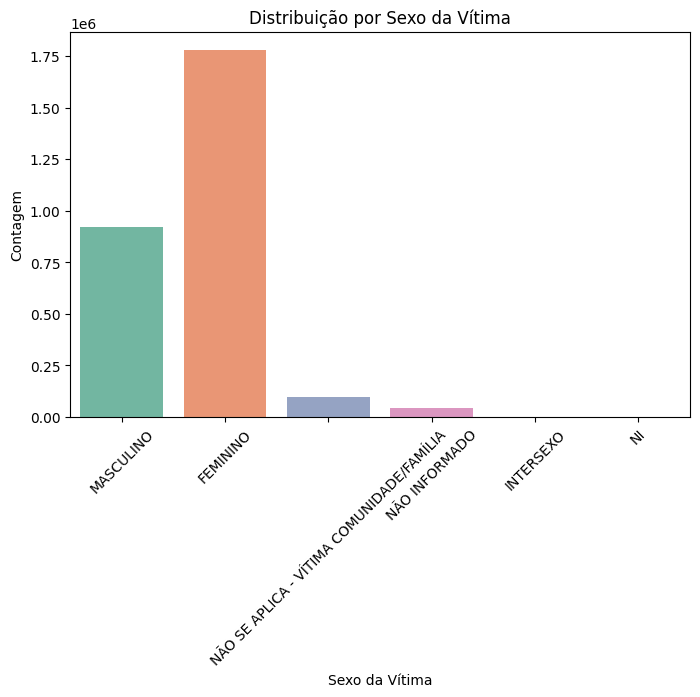

In [27]:
# Gráfico de barras para o sexo da vítima

plt.figure(figsize=(8, 5))
sns.countplot(x='Sexo_da_vítima', data=dados_unidos, palette='Set2')
plt.title('Distribuição por Sexo da Vítima')
plt.xlabel('Sexo da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [28]:
dados_unidos['Sexo_da_vítima'].value_counts()

FEMININO                                     1777460
MASCULINO                                     923257
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA      95553
NÃO INFORMADO                                  41764
INTERSEXO                                       1726
NI                                                 5
Name: Sexo_da_vítima, dtype: int64

#8.3 Faixa etaria da vítima

In [29]:
#Faixa_etária_da_vítima

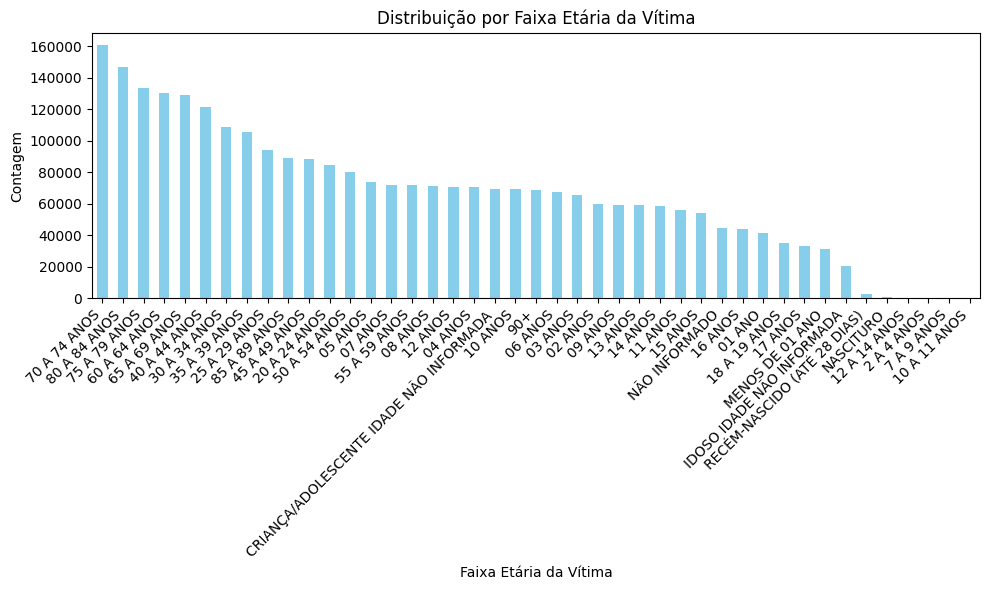

In [30]:
# Remova os valores nulos da coluna 'faixa_etaria_vitima'
dados_unidos = dados_unidos.dropna(subset=['Faixa_etária_da_vítima'])

# Função para definir os intervalos de faixa etária
def definir_intervalo_faixa_etaria(idade):
    try:
        idade_int = int(idade)
        if idade_int < 100:  # Vamos considerar apenas idades menores que 100 para evitar erros
            inicio = idade_int // 10 * 10
            fim = inicio + 9
            return f"{inicio} a {fim} anos"
    except ValueError:
        return idade

# Aplica a função para criar os intervalos de faixa etária
dados_unidos['Faixa_etária_da_vítima'] = dados_unidos['Faixa_etária_da_vítima'].apply(definir_intervalo_faixa_etaria)

# Gráfico de barras para a faixa etária da vítima

plt.figure(figsize=(10, 6))
dados_unidos['Faixa_etária_da_vítima'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição por Faixa Etária da Vítima')
plt.xlabel('Faixa Etária da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#8.4 Raça /cor da vítima

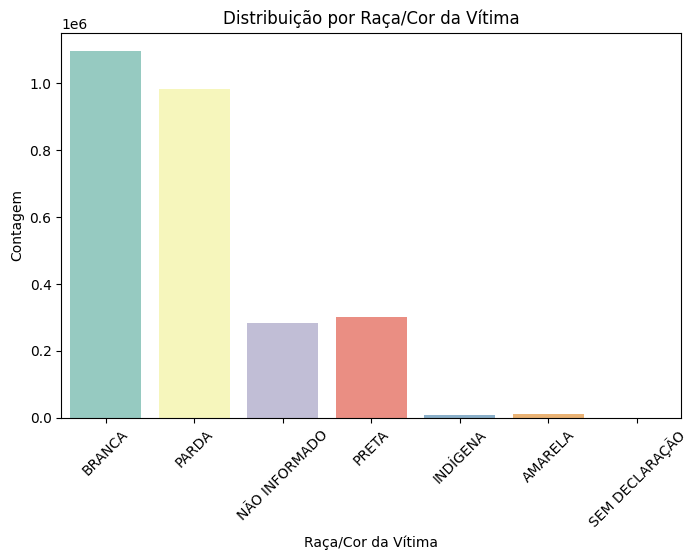

In [40]:
# Gráfico de barras para a raça/cor da vítima

plt.figure(figsize=(8, 5))
sns.countplot(x='Raça_Cor_da_vítima', data=dados_unidos, palette='Set3')
plt.title('Distribuição por Raça/Cor da Vítima')
plt.xlabel('Raça/Cor da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Tabela de frequência para a etnia da vítima

tabela_etnia = pd.crosstab(index=dados_unidos['Etnia_da_vítima'], columns='Contagem')
print(tabela_etnia)

col_0                                       Contagem
Etnia_da_vítima                                     
COMUNIDADES DE TERREIROS E MATRIZ AFRICANA       153
COMUNIDADES QUILOMBOLAS                           10
DEMAIS COMUNIDADES TRADICIONAIS                 2694
PARDO                                            398
POVOS CIGANOS                                     14
POVOS INDÍGENAS                                   79
PRETO                                            709


In [33]:
# Tabela de frequência para a faixa de renda da vítima

tabela_renda = pd.crosstab(index=dados_unidos['Faixa_de_renda_da_vítima'], columns='Contagem')
print(tabela_renda)

col_0                             Contagem
Faixa_de_renda_da_vítima                  
ATÉ 1 SM                                23
ATÉ 1/2 SALÁRIO MÍNIMO              100890
MAIS DE 1 A 2 SALÁRIOS MÍNIMOS      141003
MAIS DE 1/2 A 1 SALÁRIO MÍNIMO      155611
MAIS DE 10 A 20 SALÁRIOS MÍNIMOS      4832
MAIS DE 2 A 5 SALÁRIOS MÍNIMOS       73243
MAIS DE 20 SALÁRIOS MÍNIMOS           1969
MAIS DE 5 A 10 SALÁRIOS MÍNIMOS      17064
SEM RENDIMENTO                       99185


In [34]:
#import folium

# Crie um mapa
#mapa = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)  # Centralize o mapa em uma localização

In [35]:
# Adicionando marcadores para a localização das vítimas

#from geopy.geocoders import Nominatim

# Crie um objeto geolocator do Nominatim
#geolocator = Nominatim(user_agent="myGeocoder")

# Exemplo de busca da coordenada da cidade de São Paulo no estado de São Paulo
#location = geolocator.geocode("São Paulo, São Paulo, Brasil")

#if location:
    #latitude = location.latitude
    #longitude = location.longitude
    #print(f"Latitude: {latitude}, Longitude: {longitude}")
#else:
    #print("Localização não encontrada.")

#Principais cidades

In [36]:
dados_unidos['Município_da_vítima'].value_counts()

355030 | SÃO PAULO          230494
330455 | RIO DE JANEIRO     165769
310620 | BELO HORIZONTE      67101
530010 | BRASÍLIA            60692
130260 | MANAUS              45281
                             ...  
430187 | BARRA DO QUARAÍ         1
510345 | DENISE                  1
250220 | BOM JESUS               1
316820 | TAPIRAÍ                 1
521480 | NOVA AURORA             1
Name: Município_da_vítima, Length: 5330, dtype: int64

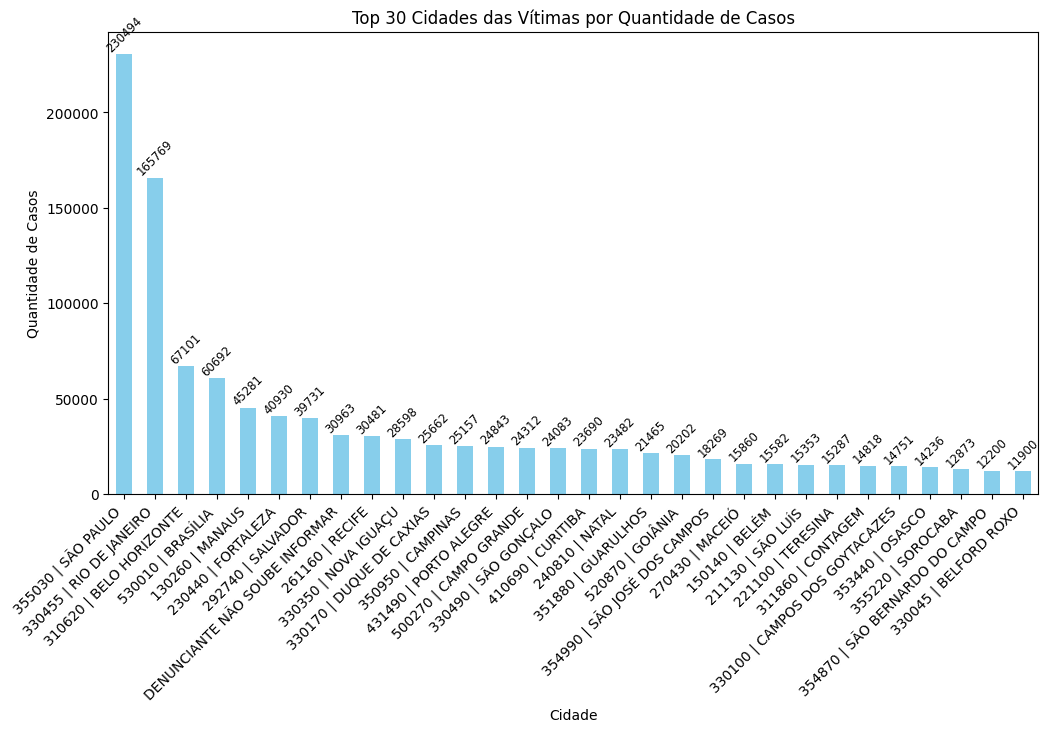

In [44]:
# Use o método value_counts para contar a quantidade de casos em cada cidade das vítimas
top_cidades_vitimas = dados_unidos['Município_da_vítima'].value_counts().head(30)

# Exiba as 20 principais cidades das vítimas por quantidade de casos em um gráfico de barras
plt.figure(figsize=(12, 6))
top_cidades_vitimas.plot(kind='bar', color='skyblue')
plt.title('Top 30 Cidades das Vítimas por Quantidade de Casos')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_cidades_vitimas.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small', rotation=45)

# Mostrando o grafico
plt.show()


# Analise de dados Geográficos

In [39]:
import pandas as pd
from geopy.geocoders import OpenCage

# Crie um objeto geolocator do Nominatim
geolocator = Nominatim(user_agent="myGeocoder")

# Função para obter as coordenadas de latitude e longitude de uma cidade
def obter_coordenadas(cidade, estado, pais):
    endereco = f"{cidade}, {estado}, {pais}"
    location = geolocator.geocode(endereco)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Crie colunas vazias para as coordenadas de latitude e longitude
dados_unidos['latitude_vitima'] = None
dados_unidos['longitude_vitima'] = None
dados_unidos['latitude_suspeito'] = None
dados_unidos['longitude_suspeito'] = None

# Preencha as colunas de latitude e longitude com base nas informações de 'municipio', 'uf' e 'pais' para as vítimas
for index, row in dados_unidos.iterrows():
    lat, lon = obter_coordenadas(row['Município_da_vítima'], row['UF_da_vítima'], row['País_da_vítima'])
    dados_unidos.at[index, 'latitude_vitima'] = lat
    dados_unidos.at[index, 'longitude_vitima'] = lon

# Preencha as colunas de latitude e longitude com base nas informações de 'municipio', 'uf' e 'pais' para os suspeitos
for index, row in dados_unidos.iterrows():
    lat, lon = obter_coordenadas(row['municipio_suspeito'], row['uf_suspeito'], row['pais_suspeito'])
    dados_unidos.at[index, 'latitude_suspeito'] = lat
    dados_unidos.at[index, 'longitude_suspeito'] = lon

# Salve o DataFrame com as coordenadas de latitude e longitude em um novo arquivo CSV
dados_unidos.to_csv('seu_dataset_com_coordenadas.csv', index=False)

GeocoderUnavailable: ignored

In [41]:
dados_unidos['UF'].value_counts()

SP                                740298
RJ                                405848
MG                                308011
RS                                162621
BA                                143734
PR                                108045
PE                                105950
SC                                 97276
CE                                 88750
GO                                 77477
DF                                 61467
RN                                 55057
AM                                 54086
ES                                 53810
PA                                 48600
MA                                 48184
MS                                 44513
PB                                 38917
PI                                 36446
AL                                 35610
SE                                 28524
DENUNCIANTE NÃO SOUBE INFORMAR     27522
MT                                 21518
RO                                 14609
TO              

In [48]:
pip install wordcloud

In [51]:
motivacao_str = dados_unidos["Motivação"].to_string()

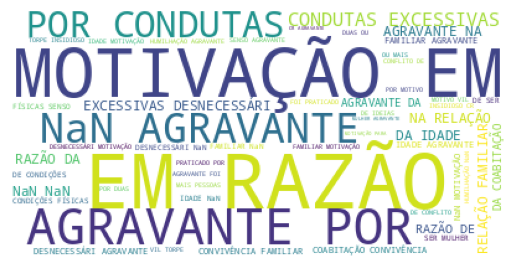

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Criando a nuvem de palavras
wordcloud = WordCloud(max_words=100, background_color="white").generate(motivacao_str)

#Grafico da nuvem de palavras
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
violacao_str = dados_unidos["violacao"].to_string()

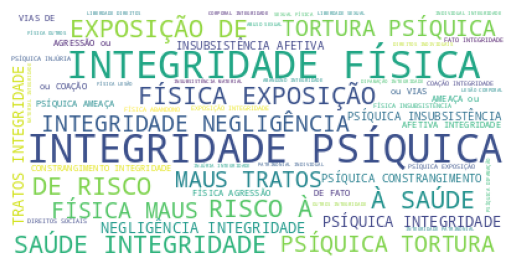

In [58]:
# Criando a nuvem de palavras
wordcloud = WordCloud(max_words=100, background_color="white").generate(violacao_str)

# Criando o título da nuvem de palavras
wordcloud.title = "Violação Causada pelo agressor"

# Grafico da nuvem de palavras
plt.imshow(wordcloud)
plt.axis("off")
plt.show()